In [96]:
import os, sys, pathlib

UTILS_FOLDER = "S00 - Utils"
curPath = os.getcwd()
parPath = pathlib.Path(curPath).parent
utilPath = os.path.join(parPath, UTILS_FOLDER)
for p in [curPath, str(parPath), utilPath]:
    sys.path.append(p)

In [97]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from aeon.datasets import load_airline
from aeon.utils.plotting import plot_series
from aeon.forecasting.model_selection import temporal_train_test_split
from aeon.forecasting.arima import ARIMA
from aeon.performance_metrics.forecasting import mean_absolute_percentage_error
from aeon.forecasting.model_selection import ExpandingWindowSplitter, SlidingWindowSplitter
from utils import plot_windows, get_windows


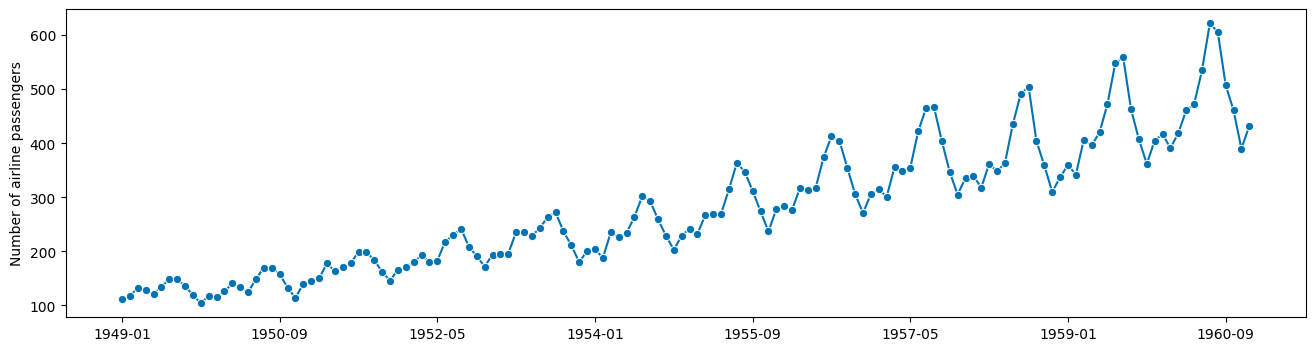

In [99]:
y = load_airline()
plot_series(y)
plt.show()

In [100]:
y_train, y_test = temporal_train_test_split(y, test_size=36)

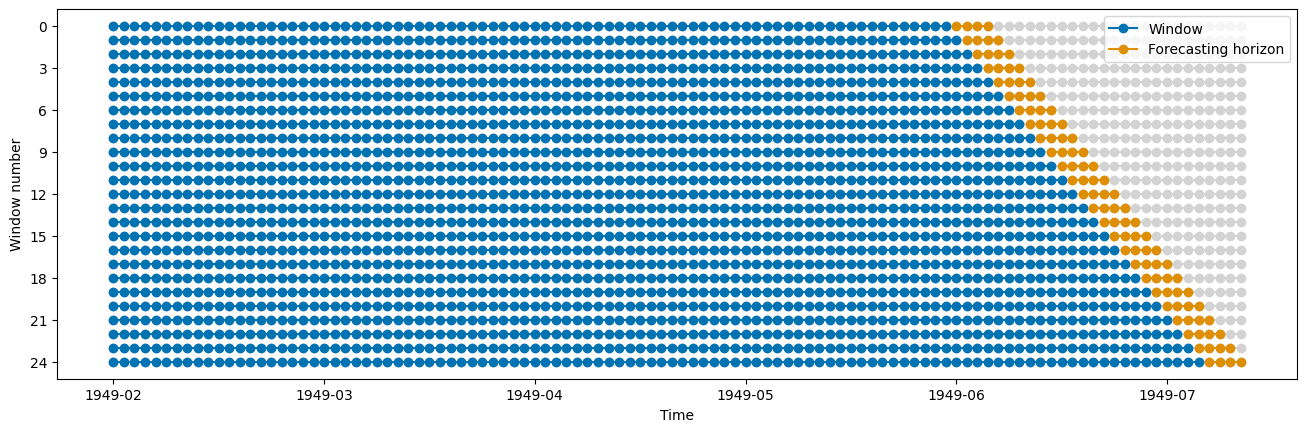

In [101]:
splitter = ExpandingWindowSplitter(fh=[1,2,3,4], initial_window=80, step_length=1)
train_windows, test_windows = get_windows(y_train, splitter)
plot_windows(y_train, train_windows, test_windows)

In [102]:
# cvs = splitter.split(y_train)

# datas = []
# for iTrain, iTest in cvs:
#     data = {"train": iTrain, "test": iTest}
#     datas.append(data)

# df = pd.DataFrame.from_dict(datas)
# display(df.head(10))

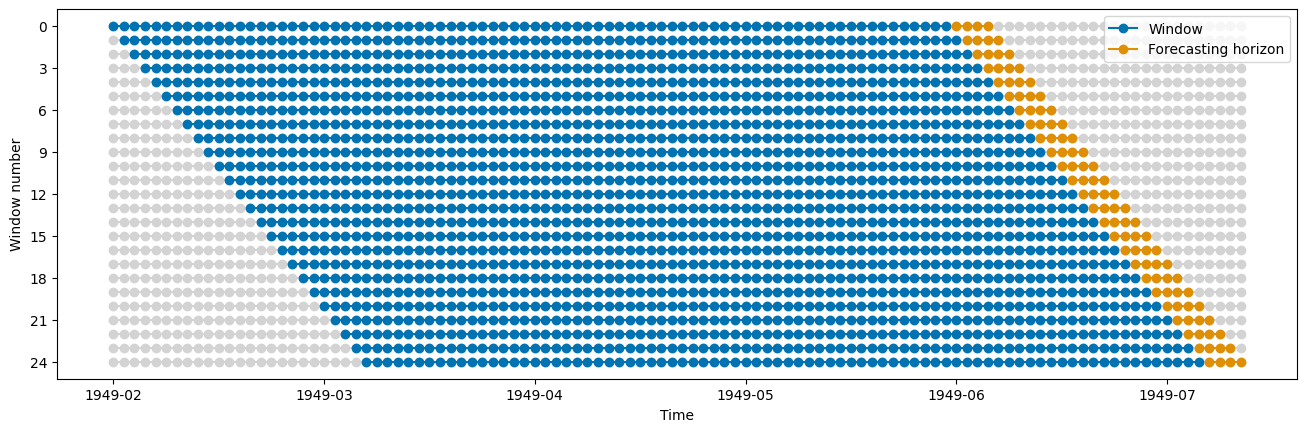

In [103]:
splitter = SlidingWindowSplitter(fh=[1,2,3,4], window_length=80, step_length=1)
train_windows, test_windows = get_windows(y_train, splitter)
plot_windows(y_train, train_windows, test_windows)

In [104]:
# cvs = splitter.split(y_train)

# datas = []
# for iTrain, iTest in cvs:
#     data = {"train": iTrain, "test": iTest}
#     datas.append(data)

# df = pd.DataFrame.from_dict(datas)
# display(df.head(10))

In [105]:
forecaster = ARIMA(order=(1, 1, 0), seasonal_order=(0, 1, 0, 12))  
fh = np.arange(1, 5)
splitter = ExpandingWindowSplitter(fh=fh, initial_window=80, step_length=1)
cvs = splitter.split(y_train)

datas = []
for ix, iy in cvs:
    # Get data
    y_train_cv = y_train.iloc[ix]
    y_test_cv = y.iloc[iy]
    # Train the model
    forecaster.fit(y_train_cv)
    # Predict
    y_pred_cv = forecaster.predict(fh)
    # Evaluate
    mape = mean_absolute_percentage_error(y_test_cv, y_pred_cv)
    # storing the results
    data = {"mape": mape}
    datas.append(data)

df = pd.DataFrame.from_dict(datas)
display(df.describe())


,mape
count,25.000000
mean,0.030352
std,0.018413
min,0.007518
25%,0.017361
50%,0.026103
75%,0.038871
max,0.077828


In [106]:
sOrders = np.arange(8, 15)
fh = np.arange(1, 5)

datas = []
for sOrder in sOrders:
    
    forecaster = ARIMA(order=(1, 1, 0), seasonal_order=(0, 1, 0, sOrder))
    splitter = ExpandingWindowSplitter(fh=fh, initial_window=60, step_length=1)
    cvs = splitter.split(y_train)
    
    datasTemp = [] 
    for ix, iy in cvs:
        # Get data
        y_train_cv = y_train.iloc[ix]
        y_test_cv = y.iloc[iy]
        # Train the model
        forecaster.fit(y_train_cv)
        # Predict
        y_pred_cv = forecaster.predict(fh)
        # Evaluate
        mape = mean_absolute_percentage_error(y_test_cv, y_pred_cv)
        # storing the results
        data = {"mape": mape}
        datasTemp.append(data)

    dfTemp = pd.DataFrame.from_dict(datasTemp)
    data = {
        "sOrder": sOrder,
        "mapeMean": dfTemp["mape"].mean(),
        "mapeStd": dfTemp["mape"].std()
    }
    datas.append(data)

df = pd.DataFrame.from_dict(datas)
display(df)

,sOrder,mapeMean,mapeStd
0,8,0.246610,0.120698
1,9,0.216960,0.160721
2,10,0.192561,0.095638
3,11,0.120787,0.047397
4,12,0.037508,0.021540
5,13,0.124325,0.058376
6,14,0.193607,0.113163


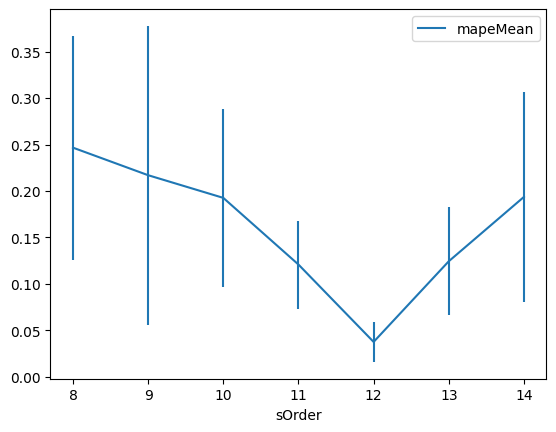

In [107]:
df.plot(x="sOrder", y="mapeMean", yerr="mapeStd")
plt.show()